# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [1]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sn
import numpy as np


# Reading in the Nobel Prize data
nobel  =  pd.read_csv("datasets/nobel.csv")

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
nobel.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [6]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
prize_share = nobel['prize_share']
print(prize_share.count())



# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ..
m = len(nobel[nobel['sex'] == "Male"])
f = len(nobel[nobel['sex'] == "Female"])
print("Males;",m)
print("Males;",f)


# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
top10 = nobel['birth_country'].value_counts()
print("country: ", top10.head(10))

911
Males; 836
Males; 49
country:  United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


Which countries win most often?

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [14]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["birth_country"] == "United State of America"
nobel['decade'] = (np.floor(nobel["year"]/10) * 10)
pro_usa_winners = nobel.groupby(["decade", "category"])["usa_born_winner"].mean()





# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...


print(pro_usa_winners)


decade  category  
1900.0  Chemistry     False
        Literature    False
        Medicine      False
        Peace         False
        Physics       False
1910.0  Chemistry     False
        Literature    False
        Medicine      False
        Peace         False
        Physics       False
1920.0  Chemistry     False
        Literature    False
        Medicine      False
        Peace         False
        Physics       False
1930.0  Chemistry     False
        Literature    False
        Medicine      False
        Peace         False
        Physics       False
1940.0  Chemistry     False
        Literature    False
        Medicine      False
        Peace         False
        Physics       False
1950.0  Chemistry     False
        Literature    False
        Medicine      False
        Peace         False
        Physics       False
                      ...  
1970.0  Chemistry     False
        Economics     False
        Literature    False
        Medicine      False
 

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

Text(0, 0.5, 'prop_usa_winners')

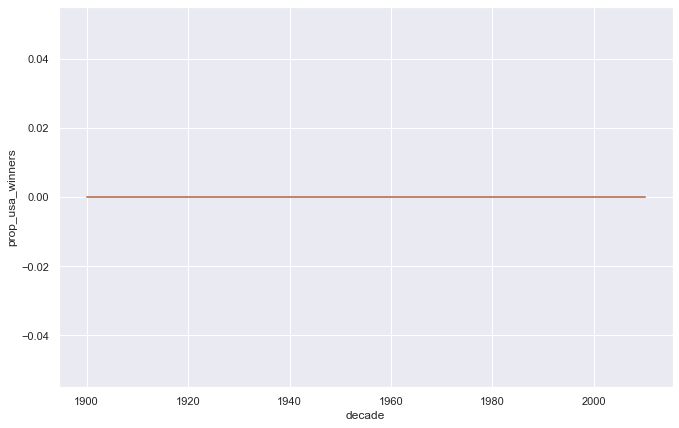

In [57]:
#using seaborn, plot the proportion of US winners by decade
# Loading in required libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
sn.set()





prop_usa_winners  = sns.lineplot(x = nobel["decade"], y = nobel["usa_born_winner"])
#prop_usa_winners = nobel.groupby(["decade", "category"], as_index=False)["usa_born_winner"].mean()

ax = sns.lineplot(x=nobel["decade"], y=nobel["usa_born_winner"])


plt.xlabel('decade')
plt.ylabel('prop_usa_winners')








What can you conclude from the graph?

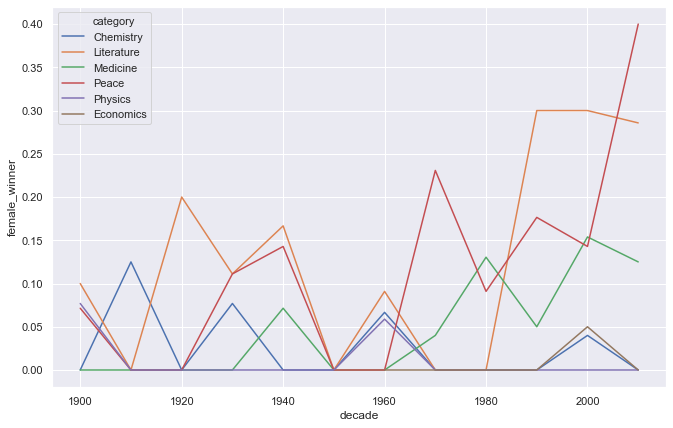

In [54]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
ax = sns.lineplot(x="decade", y="female_winner" , hue="category", data=prop_female_winners)




```
# This is formatted as code
```

 Interpret your plot here

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [25]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...

female1 = nobel[nobel["sex"] == "Female"]
female1.nsmallest(1, "year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900.0


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [26]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
nobel.groupby("full_name").filter(lambda x: len(x) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900.0
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910.0
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910.0
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940.0
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,False,1950.0
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950.0
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,False,1950.0
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950.0
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,False,1960.0
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960.0





How many people have received 2 or more prizes?

four people which are
Frederick Sanger, Linus Pauling, John Bardeen and Marie Curie.


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [27]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel["birth_date"])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year


# What is the mean age of winners and it's standard devation? What is the median age?

## 9. Age differences between prize categories


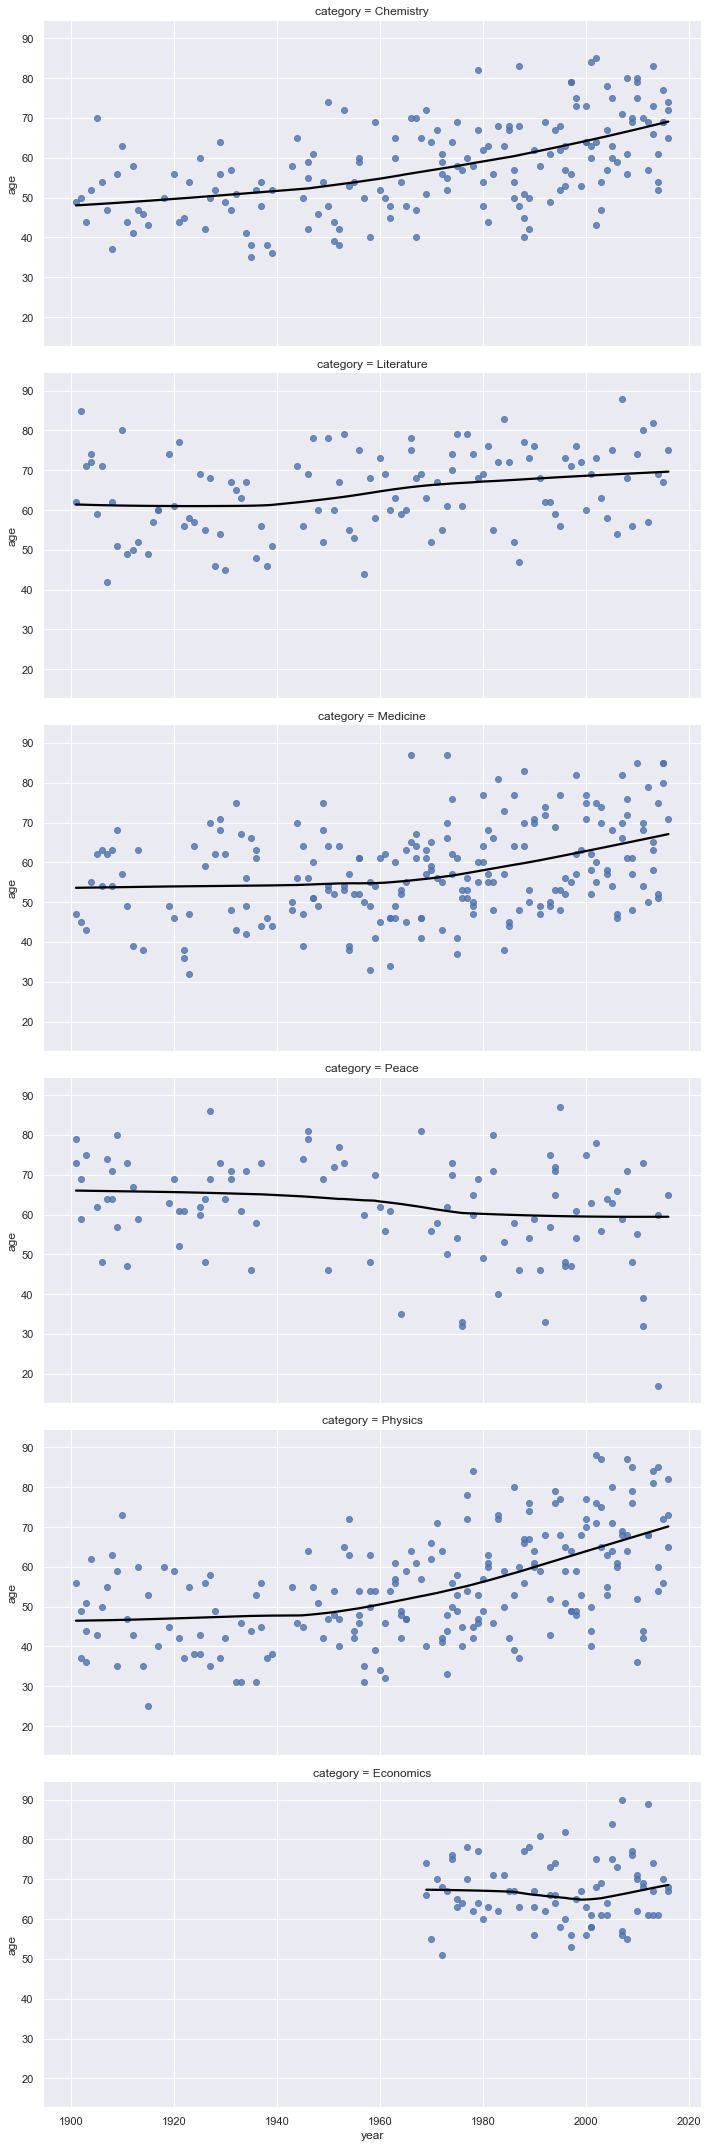

In [58]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
sns.lmplot(x="year", y="age", data=nobel, row="category", lowess=True, aspect=2, line_kws={"color" : "black"})


# Plot the age of nobel candidates by decade and prize category

In [ ]:
What can you conclude about the age at which people win different types of Nobel Prizes?

only one person who was younger than 20 years has ever the prize and in economics only people older than 49 received the prize.
There has never been anyone older than 100 years who has ever won the prize.

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?
    
Arthur Ashkin, one of the winners of the Nobel Prize for physics , is the oldest person ever named as a laureate for any of the prestigious awards. At age 96, Ashkin, 
    
Yousafzai was announced as the co-recipient of the 2014 Nobel Peace Prize for her struggle against the suppression of children and young people and for the right of all children to education. Having received the prize at the age of 17
    
    

## Congratulations! You've reached the end of the challenge!